## Chapter3 - Vector

### 3.3 벡터로 무엇을 표현할 수 있는가?

##### Task 3.3.2

In [83]:
import matplotlib.pyplot as plt
%matplotlib inline  

def plot(Z):
    plt.xlim([-5, 5])
    plt.ylim([-5, 5])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axhline(0)
    plt.axvline(0)
    
    plt.scatter([x[0] for x in Z], [x[1] for x in Z], color='red')
    
def plotV(v, sv=[0,0]):
    plt.xlim([-7, 7])
    plt.ylim([-7, 7])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.axhline(0)
    plt.axvline(0)
    
    plt.arrow(sv[0], sv[1], v[0], v[1], head_width=0.2, head_length=0.2, fc='k', ec='k')

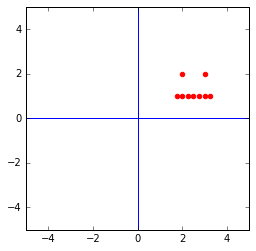

In [26]:
L = [[2, 2], [3, 2], [1.75, 1], [2, 1], [2.25 , 1], [2.5, 1],
     [2.75, 1], [3, 1], [3.25, 1]]

plot(L)

### 3.4 벡터 덧셈

#### 3.4.1 평행이동과 벡터 덧셈

In [46]:
def add2(v, w): return [v[0]+w[0], v[1]+w[1]]

##### Task 3.4.3

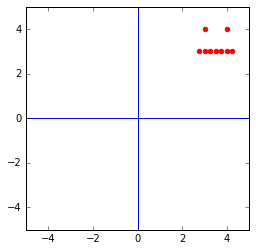

In [43]:
plot([add2(v, [1, 2]) for v in L])

###### Quiz 3.4.4

In [48]:
def addn(v, w): return [x+y for (x,y) in zip(v,w)]

##### Exercise 3.4.6

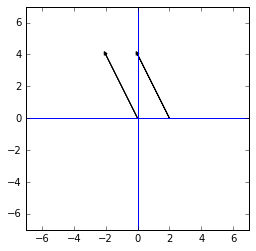

In [84]:
plotV([-2,4])
plotV([-2, 4], [2, 0])

##### Exercise 3.4.7

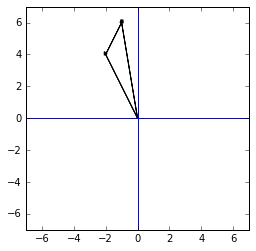

In [85]:
plotV([-2,4])
plotV([1,2], [-2,4])
plotV([-1,6])

### 3.5 스칼라-벡터 곱셈

##### Quiz 3.5.3

In [86]:
def scalar_vector_mult(alpha, v): return [alpha*x for x in v]

##### Task 3.5.4

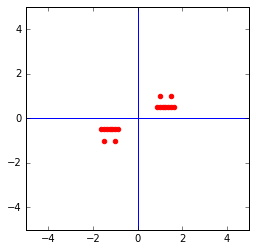

In [90]:
plot([scalar_vector_mult(0.5, l) for l in L])
plot([scalar_vector_mult(-0.5, l) for l in L])

#### 3.5.3 원점을 지나는 선분

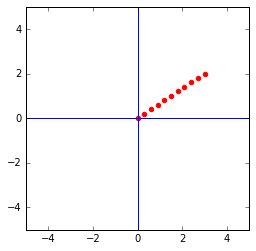

In [94]:
plot([scalar_vector_mult(i/10, [3,2]) for i in range(11)])

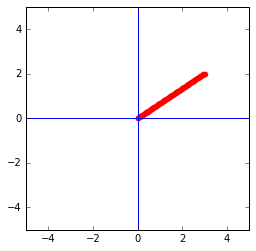

In [97]:
plot([scalar_vector_mult(i/100, [3,2]) for i in range(101)])

### 3.6 벡터 덧셈과 스칼라 곱셈 결합하기

#### 3.6.1 원점을 지나지 않는 선분과 직선 

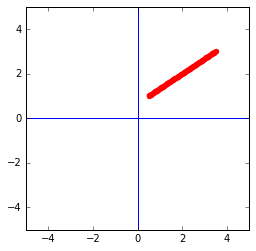

In [98]:
plot([add2(scalar_vector_mult(i/100, [3,2]), [0.5, 1]) for i in range(101)])

#### 3.6.3 블록겹합(Convex combination) 들여다 보기

##### Task 3.6.9

In [115]:
def segment(pt1, pt2): return [add2(scalar_vector_mult(a/100, pt1), scalar_vector_mult(1-a/100, pt2))
                               for a in range(101)]

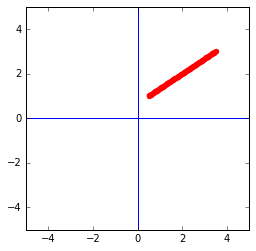

In [116]:
plot(segment([3.5,3], [0.5,1]))

### 3.7 딕셔너리에 기반을 둔 벡터 표현

In [19]:
class Vec:
    def __init__(self, labels, function):
        self.D = labels
        self.f = function
        
    def __mul__(self, other):
        return sum([s*o for (s, o) in zip(self.f.values(), other.f.values())])

    def __repr__(self):
        return 'Vec(' + str(self.D) + ', ' + str(self.f) +')'
    
    __getitem__ = getitem
    __setitem__ = setitem

NameError: name 'getitem' is not defined

In [7]:
v = Vec({'A', 'B', 'C'}, {'A':1})

for d in v.D:
    if d in v.f:
        print(v.f[d])

1


In [95]:
def zero_vec(D): return Vec(D, {})

#### 3.7.1 세터(Setter)와 게터(Getter)

In [24]:
def setitem(v, d, val): v.f[d] = val

In [129]:
setitem(v, 'B', 2)
for d in v.D:
    if d in v.f:
        print(d,':', v.f[d])

B : 2
A : 1


##### Quiz 3.7.2

In [23]:
def getitem(v, d): return v.f[d] if d in v.f else 0

In [134]:
getitem(v, 'A')

1

#### 3.7.2 스칼라-벡터 곱셈

##### Quiz 3.7.3

In [142]:
def scalar_mul(v, alpha): return Vec(v.D, {d:alpha*getitem(v, d) for d in v.D})

In [143]:
scalar_mul(v, 2).f

{'A': 2, 'B': 4, 'C': 0}

#### 3.7.3 덧셈

##### Quiz. 3.7.4

In [147]:
def add(u, v): return Vec(v.D, {d:getitem(v, d) + getitem(u, d) for d in v.D})

In [148]:
u = Vec(v.D, {'A':5, 'C':10})
add(u, v).f

{'A': 6, 'B': 2, 'C': 10}

#### 3.7.5 음의 벡터, 벡터 덧셈의 가역성, 벡터 뺄셈

##### Quiz 3.7.5

In [151]:
def neg(v): return scalar_mul(v, -1)

In [152]:
neg(v).f

{'A': -1, 'B': -2, 'C': 0}

### GF(2)상의 벡터

In [2]:
from GF2 import one

##### Quiz 3.8.1

In [8]:
list1 = [one, one, 0, one]
list2 = [0, one, one, one]

[l1+l2 for l1, l2 in zip(list1, list2)]

[one, 0, one, 0]

### 3.9 도트곱(Dot product)

##### Quiz 3.9.4

In [7]:
def list_dot(u, v): return sum([u1*v1 for (u1, v1) in zip(u, v)])

In [4]:
u = [1, 1, 1, 1, 1]
v = [10, 20, 0, 40, -100]
list_dot(u, v)

-30

#### 3.9.3 유사성(Similarity) 측정하기

##### Quiz 3.9.15

In [17]:
def dot_product_list(needle, haystack):
    diff_len = len(haystack) - len(needle) + 1
    return [list_dot(needle, haystack[i:i+len(needle)]) for i in range(diff_len)]

In [25]:
needle = [1, -1, 1, 1, -1, 1]
haystack = [1, -1, 1, 1, 1, -1, 1, 1, 1]
dot_product_list(needle, haystack)

[2, 2, 0, 0]

### 3.10 Vec 구현

#### 3.10.6 리스트에서 Vec으로

In [98]:
%load_ext autoreload
%autoreload 2

from vec import Vec

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
v = Vec({'a','b','c', 'd'},{'a':2,'c':1,'d':3})
print(v['d'])
print(v['b'])

3
0


In [44]:
v = Vec({'a', 'b', 'c'}, {'b':0})
v['b'] = 5
v['b']

5

In [55]:
print(Vec({'a', 'b', 'c'}, {'a':0}) == Vec({'a', 'b', 'c'}, {'b':0}))
print(Vec({'a', 'b', 'c'}, {'a': 0}) == Vec({'a', 'b', 'c'}, {}))
print(Vec({'a', 'b', 'c'}, {}) == Vec({'a', 'b', 'c'}, {'a': 0}))
print(Vec({'x','y','z'},{'y':1,'x':2}) == Vec({'x','y','z'},{'y':1,'z':0}))
print(Vec({'a','b','c'}, {'a':0,'c':1}) == Vec({'a','b','c'}, {'a':0,'c':1,'b':4}))
print(Vec({'a','b','c'}, {'a':0,'c':1,'b':4}) == Vec({'a','b','c'}, {'a':0,'c':1}))

True
True
True
False
False
False


In [57]:
a = Vec({'a','e','i','o','u'}, {'a':0,'e':1,'i':2})
b = Vec({'a','e','i','o','u'}, {'o':4,'u':7})
c = Vec({'a','e','i','o','u'}, {'a':0,'e':1,'i':2,'o':4,'u':7})
a+b

Vec({'a', 'u', 'i', 'e', 'o'},{'o': 4, 'a': 0, 'i': 2, 'e': 1, 'u': 7})

In [75]:
u1 = Vec({'a','b'}, {'a':1, 'b':2})
u2 = Vec({'a','b'}, {'b':2, 'a':1})
print(u1*u2)
print(u1 == Vec({'a','b'}, {'a':1, 'b':2}))
print(u2 == Vec({'a','b'}, {'b':2, 'a':1}))

v1 = Vec({'p','q','r','s'}, {'p':2,'s':3,'q':-1,'r':0})
v2 = Vec({'p','q','r','s'}, {'p':-2,'r':5})
print(v1*v2)

w1 = Vec({'a','b','c'}, {'a':2,'b':3,'c':4})
w2 = Vec({'a','b','c'}, {'a':12,'b':8,'c':6})
print(w1*w2)

5
True
True
-4
72


In [84]:
zero = Vec({'x','y','z','w'}, {})
u = Vec({'x','y','z','w'},{'x':1,'y':2,'z':3,'w':4})
print(0*u == zero)
print(1*u == u)
print(0.5*u == Vec({'x','y','z','w'},{'x':0.5,'y':1,'z':1.5,'w':2}))
print(u == Vec({'x','y','z','w'},{'x':1,'y':2,'z':3,'w':4}))

True
True
True
True


In [90]:
u = Vec({1,3,5,7},{1:1,3:2,5:3,7:4})
print(-u)
print(u == Vec({1,3,5,7},{1:1,3:2,5:3,7:4}))
print(-Vec({'a','b','c'}, {'a':1}) == Vec({'a','b','c'}, {'a':-1}))


  1  3  5  7
------------
 -1 -2 -3 -4
True
True


##### Quiz 3.10.1

In [8]:
def list2vec(L): return Vec(set(range(len(L))), {k:v for (k, v) in enumerate(L)})

In [15]:
list2vec([10, 20, 30])

Vec({0, 1, 2}, {0: 10, 1: 20, 2: 30})

### 3.11 선형방정식들의 삼각시스템에 대한 해 구하기

#### 3.11.3 후진대입법의 첫 번째 구현

In [67]:
def triangular_solve_n(rowlist, b):
    D = rowlist[0].D
    n = len(D)
    assert D == set(range(n))
    x = zero_vec(D)
    for i in reversed(range(n)):
        x[i] = (b[i] - rowlist[i]*x) / rowlist[i][i]
    
    return x

In [68]:
rowlist = [list2vec([1, -3, -2]), list2vec([0, 2, 4]), list2vec([0, 0, -10])]
b = [7, 4, 12]

triangular_solve_n(rowlist, b)

Vec({0, 1, 2}, {0: 17.8, 1: 4.4, 2: -1.2})

#### 3.11.5 임의의 정의역을 가진 벡터들에 대한 후진대입법

In [96]:
def triangular_solve(rowlist, label_list, b):
    D = rowlist[0].D
    n = len(D)
    x = zero_vec(D)
    for j in reversed(range(n)):
        c = label_list[j]
        row = rowlist[j]
        x[c] = (b[j] - row*x) /  row[c]
        
    return x

In [100]:
label_list = ['a', 'b', 'c', 'd']
D = set(label_list)
rowlist = [Vec(D, {'a':4, 'b':-2, 'c':0.5, 'd':1}), 
           Vec(D, {'b':2, 'c':3, 'd':3}), 
           Vec(D, {'c':5, 'd':1}), 
           Vec(D, {'d':2})]
b = [6, -4, 3, -8]

triangular_solve(rowlist, label_list,  b)

Vec({'c', 'a', 'b', 'd'},{'d': -4.0, 'a': 3.2750000000000004, 'c': 1.4, 'b': 1.9000000000000004})